## Importing Libraries

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

# DATA Preprocessing 

Traning Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [42]:
# iterated
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break
    

tf.Tensor(
[[[[2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   ...
   [2.5125e+02 2.4950e+02 2.5200e+02]
   [2.5425e+02 2.5300e+02 2.5450e+02]
   [2.5500e+02 2.5400e+02 2.5500e+02]]

  [[2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   ...
   [2.5275e+02 2.5100e+02 2.5325e+02]
   [2.5050e+02 2.4900e+02 2.5100e+02]
   [2.5475e+02 2.5350e+02 2.5500e+02]]

  [[2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   ...
   [2.5325e+02 2.5175e+02 2.5375e+02]
   [2.5000e+02 2.4825e+02 2.5075e+02]
   [2.5275e+02 2.5100e+02 2.5350e+02]]

  ...

  [[2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   ...
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]
   [2.5500e+02 2.5500e+02 2.5500e+02]]

  [[2.5500e+02 2.5500e+02 2.5500e+

### To Avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from image there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature.

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
## Building Convolution layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))   ## TO AVOID OVERFITTING

In [15]:
model.add(Flatten())

In [16]:
#Hidden Layer
model.add(Dense(units=1500,activation='relu'))  ##units means neurons

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))


## Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 2264s 1s/step - loss: 1.2639 - accuracy: 0.6230 - val_loss: 0.5102 - val_accuracy: 0.8383
Epoch 2/10
2197/2197 [==============================] - 2160s 983ms/step - loss: 0.4263 - accuracy: 0.8650 - val_loss: 0.2498 - val_accuracy: 0.9188
Epoch 3/10
2197/2197 [==============================] - 2081s 947ms/step - loss: 0.2529 - accuracy: 0.9175 - val_loss: 0.2193 - val_accuracy: 0.9278
Epoch 4/10
2197/2197 [==============================] - 2099s 955ms/step - loss: 0.1773 - accuracy: 0.9417 - val_loss: 0.1732 - val_accuracy: 0.9454
Epoch 5/10
2197/2197 [==============================] - 2195s 999ms/step - loss: 0.1342 - accuracy: 0.9552 - val_loss: 0.1522 - val_accuracy: 0.9523
Epoch 6/10
2197/2197 [==============================] - 2159s 983ms/step - loss: 0.1025 - accuracy: 0.9663 - val_loss: 0.1395 - val_accuracy: 0.9575
Epoch 7/10
2197/2197 [==============================] - 2087s 950ms/step - loss: 0.0906 - accuracy: 0.9706 - 

## Model Evaluation

In [23]:
# model evaluation on Training set

In [22]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 603s 274ms/step - loss: 0.0176 - accuracy: 0.9947


In [25]:
print(train_loss,train_acc)

0.017608677968382835 0.9947222471237183


In [24]:
# model evaluation on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 170s 308ms/step - loss: 0.0994 - accuracy: 0.9719


In [26]:
print(val_loss,val_acc)

0.09942472726106644 0.9718871116638184


## Saving Model

In [27]:
model.save("trained_model.h5")

In [29]:
model.save("trained_model.keras")

## History of our model 

In [31]:
training_history.history

{'loss': [1.2639356851577759,
  0.4263427257537842,
  0.252885639667511,
  0.1772805154323578,
  0.13424623012542725,
  0.10250895470380783,
  0.09062120318412781,
  0.06978138536214828,
  0.06598889827728271,
  0.053810253739356995],
 'accuracy': [0.6230173110961914,
  0.8650401830673218,
  0.9175047874450684,
  0.941688597202301,
  0.95516037940979,
  0.9663276076316833,
  0.9706095457077026,
  0.9772387742996216,
  0.9791877269744873,
  0.9828295111656189],
 'val_loss': [0.5102290511131287,
  0.24978329241275787,
  0.2192608267068863,
  0.17318490147590637,
  0.15218645334243774,
  0.13953162729740143,
  0.13404536247253418,
  0.19319431483745575,
  0.19925522804260254,
  0.09942470490932465],
 'val_accuracy': [0.8383223414421082,
  0.9188481569290161,
  0.9277828335762024,
  0.9454245567321777,
  0.9523105025291443,
  0.9575461149215698,
  0.9585135579109192,
  0.9446278214454651,
  0.9405872821807861,
  0.9718871116638184]}

In [32]:
# Recording History in json 
import json 
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)
with open("training_hist.json","r") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

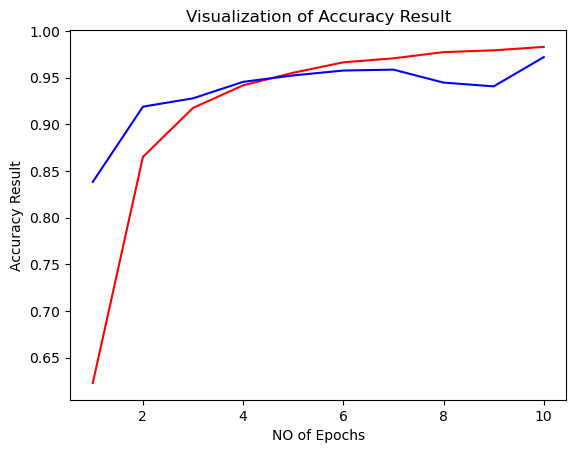

In [35]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("NO of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend

plt.show()

## Some other metrices for model evaluation

In [37]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [38]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [39]:
y_pred = model.predict(test_set)
y_pred

550/550 [==============================] - 129s 235ms/step


array([[9.9999863e-01, 9.6990714e-12, 2.5614584e-12, ..., 9.0740276e-15,
        6.3965645e-15, 1.2377492e-13],
       [9.8832047e-01, 2.4578667e-06, 3.9642181e-08, ..., 1.1861255e-10,
        5.6425164e-12, 8.5782945e-09],
       [9.9999994e-01, 6.9790541e-14, 4.2549938e-15, ..., 4.9620489e-21,
        1.5271249e-20, 1.8178581e-17],
       ...,
       [1.9262588e-11, 2.8379428e-13, 1.5632248e-09, ..., 7.6134390e-13,
        1.0440538e-11, 9.9999905e-01],
       [3.4764689e-12, 6.6345829e-15, 1.3213504e-11, ..., 4.1472038e-14,
        2.6073962e-13, 1.0000000e+00],
       [8.7818381e-12, 7.5512808e-12, 1.0727146e-12, ..., 3.3325407e-13,
        1.4448873e-11, 9.9987280e-01]], dtype=float32)

In [40]:
y_pred.shape

(17572, 38)

In [41]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [44]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

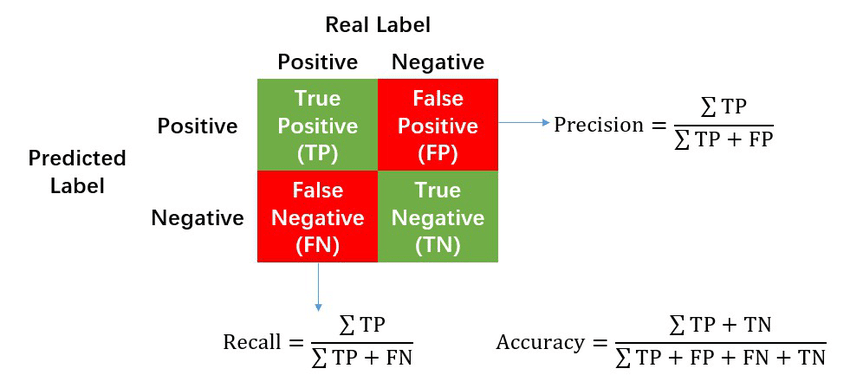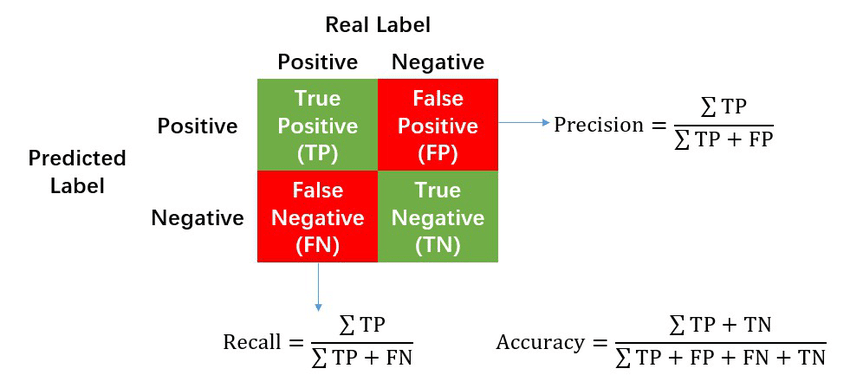

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(Y_true,predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.96       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.97      0.98      0.97       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.96      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.93      0.

In [56]:
# F1 is harmonic mean of precision and recall

In [58]:
cm = confusion_matrix(Y_true,predicted_categories)
cm
cm.shape

(38, 38)

### Confusion Matrix Visualization 

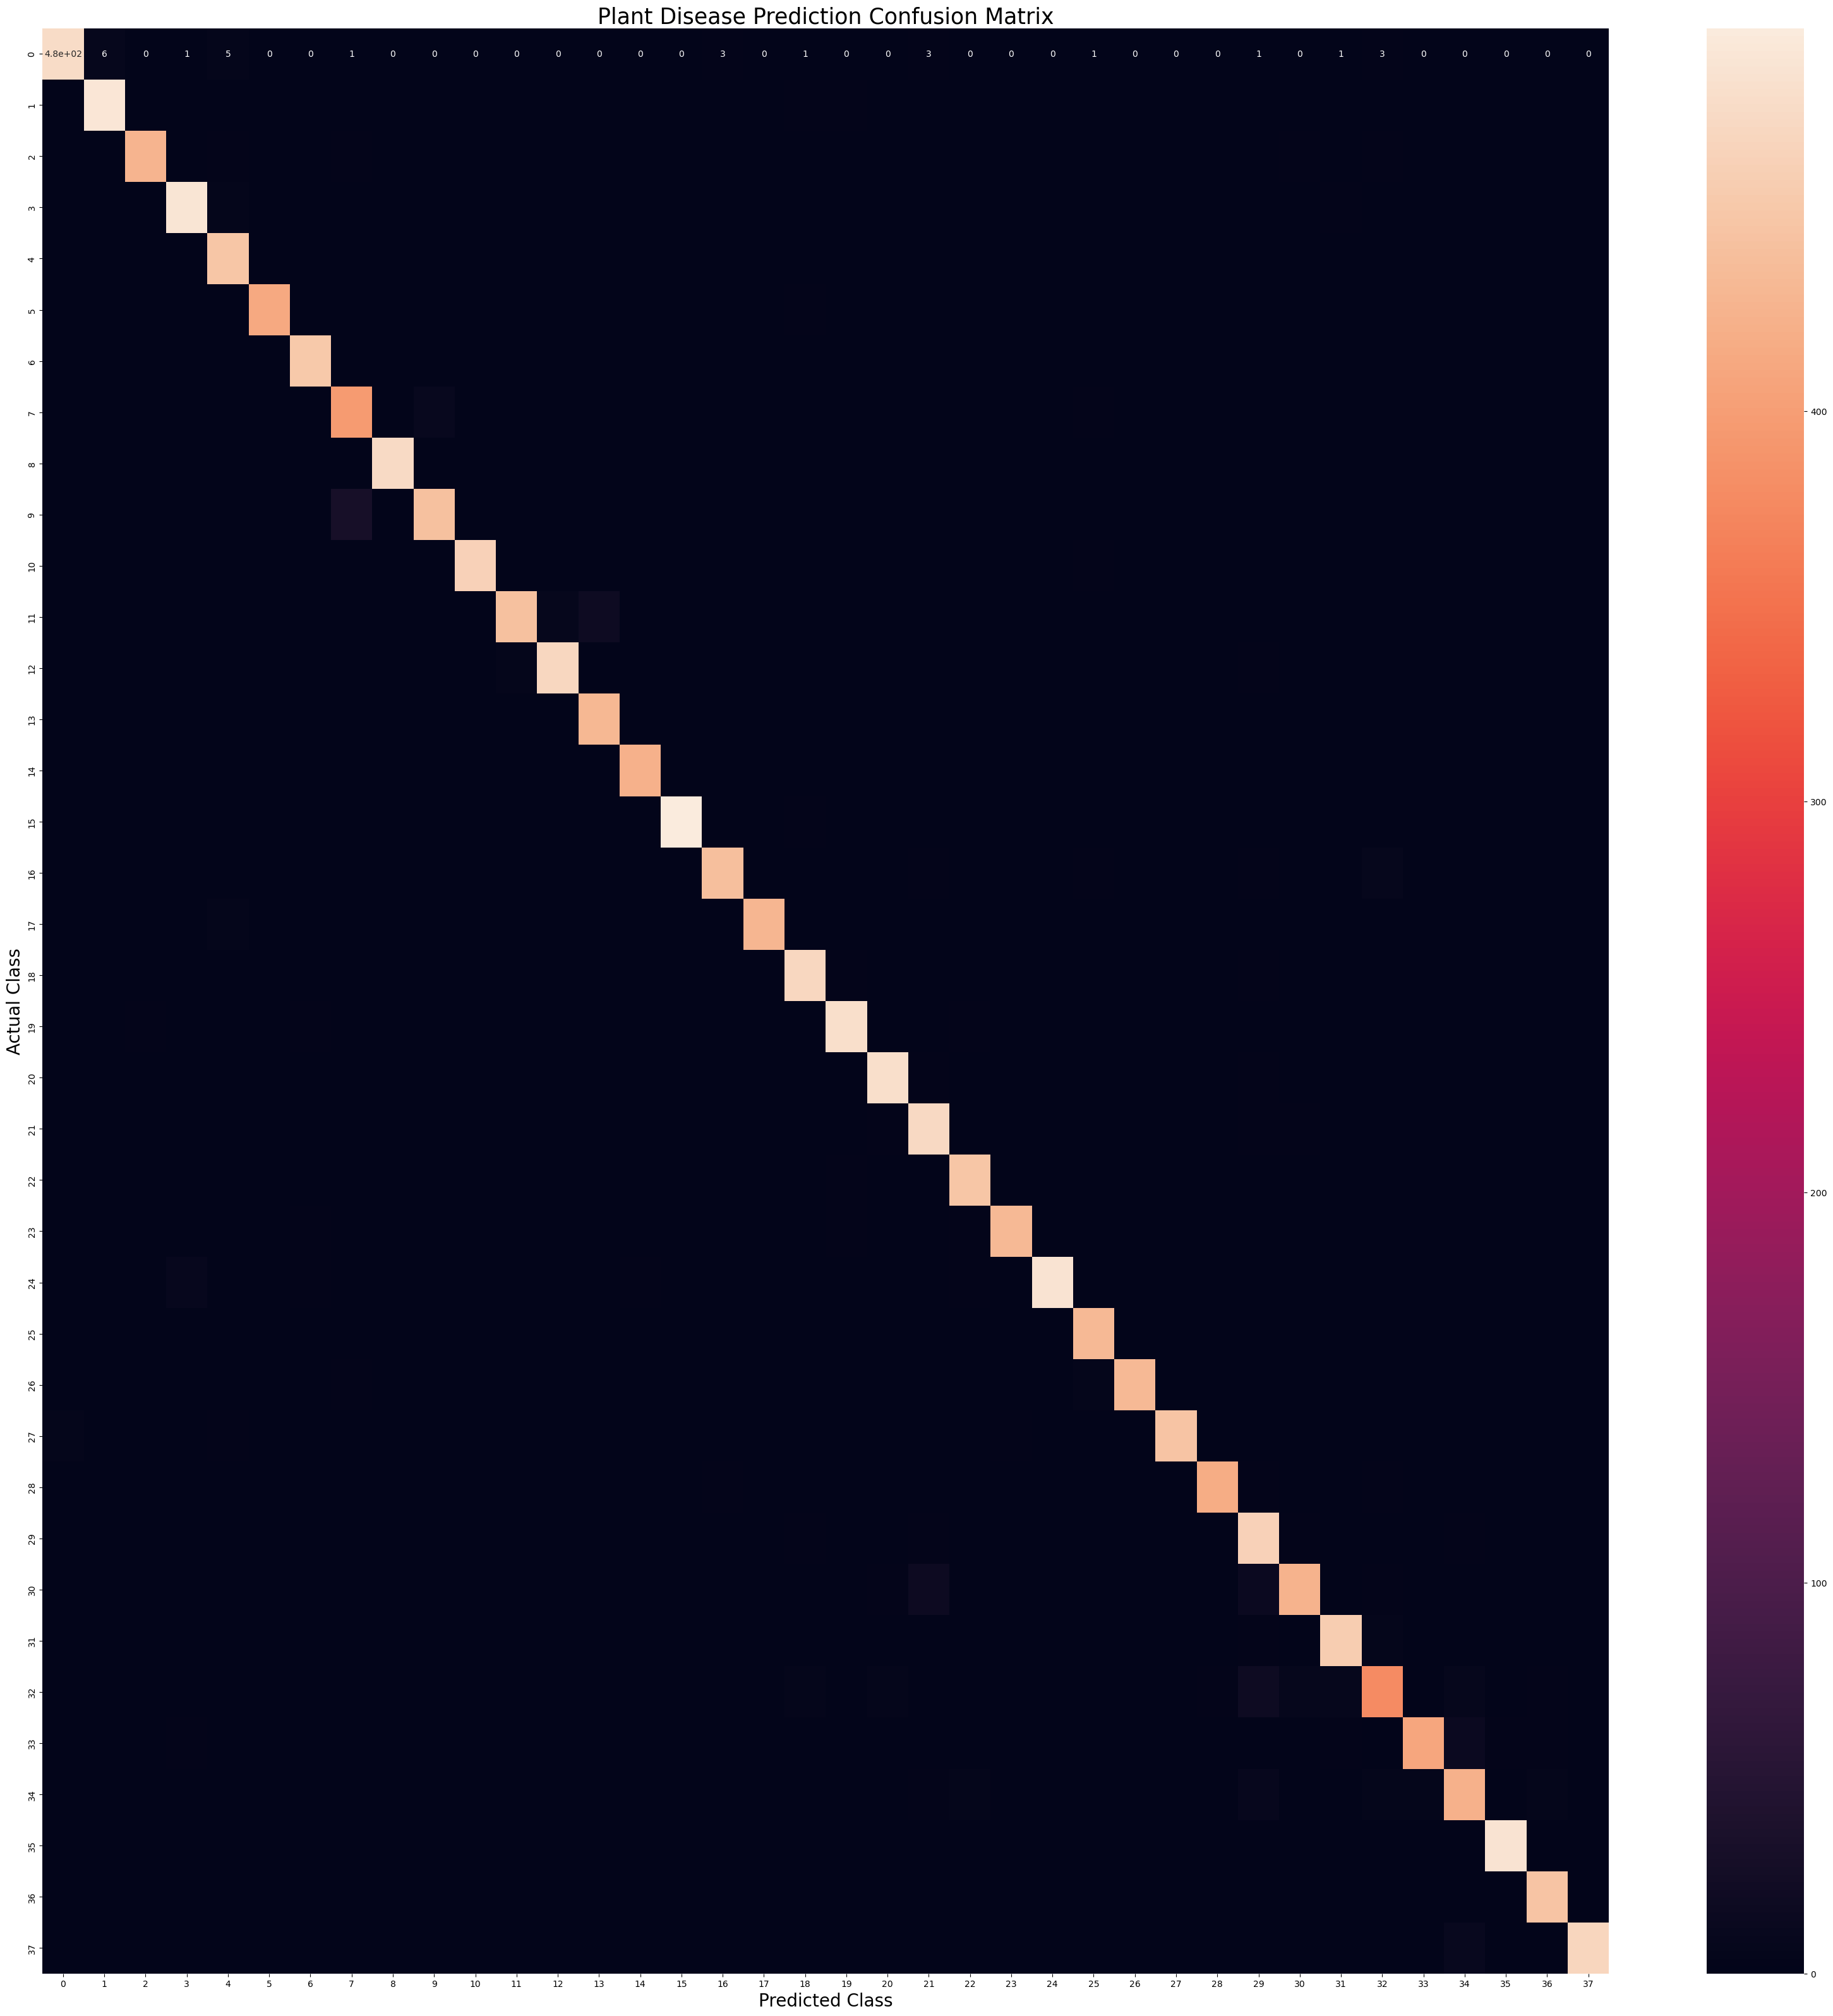

In [65]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()